In [543]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import math

The following are some functions to:
    - printing out some overview informations of a DataFrame (similar to function info() of Pandas)
        + how many columns does it have?
        + how many rows does it have?
        + how many valid data rows? how many invalid data rows?
        + what are valid values of each column?
    - extract the VALID and INVALID data rows of each column.

In [964]:
# this function will extract the valid data of each column name

# input parameters: 
# the first parameter should be a DataFrame
# the second parameter should be a string of column name

# output:
# return a DataFrame or Series which contains all valid rows of the column

def extract_valid_value(data, column_name):
    if column_name == 'PassengerId':
        return data[ data['PassengerId'] != None]
    elif column_name == 'Survived':
        return data[ (data['Survived'] == 0) | (data['Survived'] == 1) ]
    elif column_name == 'Name':
        return data[ data['Name'] != None ]
    elif column_name == 'Sex':
        return data[ (data['Sex'] == 'male') | (data['Sex'] == 'female') ]
    elif column_name == 'Age':
        return data[ (data['Age'] > 0) & (data['Age'] < 123) ]
    elif column_name == 'SibSp':
        return data[ (data['SibSp'] >= 0) & (data['SibSp'] <= 8) ]
    elif column_name == 'Parch':
        return data[ (data['Parch'] >= 0) & (data['Parch'] <= 6) ]
    elif column_name == 'Ticket':
        return data[ data['Ticket'] != None ]
    elif column_name == 'Fare':
        return data[ data['Fare'] > 0 ]
    elif column_name == 'Cabin':
        return data[ data['Cabin'] != None ]
    elif column_name == 'Embarked':
        return data[ (data['Embarked'] != None) &  (pd.isnull(data['Embarked']) == False)]
    elif column_name == 'Pclass':
        return data[ (data['Pclass'] == 1) | (data['Pclass'] == 2) | (data['Pclass'] == 3)  ]
    else:
        return None

In [965]:
# extract the invalid rows in column column_name of data
def extract_invalid_data(data, column_name):
    column_valid_data = data.isin(extract_valid_value(data, column_name))[column_name]
    return data[ column_valid_data == False ]

In [966]:
# function to display some characteristic of values in the data column
# it is similar to info() function of DataFrame but the messages are more friendly.

# if the column name is one of ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
# then just display the unique values.

# if the column name is one of ['Name', 'Ticket', 'Cabin']
# then the data values are free texts.

# if the column name is one of ['Age', 'Fare']
# then the data values fall in the interval of minimum and maximum values

def get_characteristic_values(data, column_name):
    columns_categorical_data = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
    columns_text_data = ['Name', 'Ticket', 'Cabin']
    columns_numeric_data = ['Age', 'Fare']
    
    if column_name in columns_categorical_data:
        unique_values = set(data[column_name].dropna())
        print("   Data values: ", unique_values)
    elif column_name in columns_text_data:
        print("   Data values: free text.")
    elif column_name in columns_numeric_data:
        min_value = min(data[column_name])
        max_value = max(data[column_name])
        print("   Data values: in range (", min_value, ", ", max_value, ")")
    elif column_name == 'PassengerId':
        print("")
    else:
        print("Invalid column name")    

In [967]:
# this function will print out some overview informations of data:

# data type of data
# how many columns that data has
# column names of data
# how many rows the data has
# with each column: how many row it has totally, how many are valid, how many are invalid

def data_overviewing(data):
    print("Type of data: ", type(data))
    print("Number of columns: ", len(data.columns))
    print("Column names: ", data.columns)
    print("Number of rows of full data: ", len(data), " rows." )
        
    for column_name in data.columns:
        number_of_rows = len(data[column_name])
        number_of_valid_rows = len(extract_valid_value(data, column_name))
        number_of_invalid_rows = number_of_rows - number_of_valid_rows
        print("Column " + column_name + " has: totally ", number_of_rows, " rows, ", number_of_valid_rows, " rows are valid, ", number_of_invalid_rows, " rows are invalid.")        
        get_characteristic_values(data, column_name)

In [968]:
# reading data from csv file
full_data = pd.read_csv('titanic-data.csv')

In [969]:
# printing out the first 5 rows of full data
full_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In here I will take a look into the full data to find whether there is any invalid data in the dataset, if there is I need to be noticed for analyzing later.

In [970]:
data_overviewing(full_data)

Type of data:  <class 'pandas.core.frame.DataFrame'>
Number of columns:  12
Column names:  Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Number of rows of full data:  891  rows.
Column PassengerId has: totally  891  rows,  891  rows are valid,  0  rows are invalid.

Column Survived has: totally  891  rows,  891  rows are valid,  0  rows are invalid.
   Data values:  {0, 1}
Column Pclass has: totally  891  rows,  891  rows are valid,  0  rows are invalid.
   Data values:  {1, 2, 3}
Column Name has: totally  891  rows,  891  rows are valid,  0  rows are invalid.
   Data values: free text.
Column Sex has: totally  891  rows,  891  rows are valid,  0  rows are invalid.
   Data values:  {'female', 'male'}
Column Age has: totally  891  rows,  714  rows are valid,  177  rows are invalid.
   Data values: in range ( 0.42 ,  80.0 )
Column SibSp has: totally  891  rows,  891  rows are valid,

Above information tells that full data has 12 columns, they are 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'. There are totally 891 data rows.

Column Survived has 2 values 0 or 1. All data rows are valid. No invalid rows found.

Column Pclass has 2 values 1, 2 or 3. All data rows are valid. No invalid rows found.

Column Name's data are free text. All data rows are valid. No invalid rows found.

Column Sex has 2 values 'male' or 'female'. All data rows are valid. No invalid rows found.

Column Age has values fall in range [0.42, 80.0]. There are 714 valid rows and 177 invalid rows found.

Column SibSp has 7 values: 0, 1, 2, 3, 4, 5 or 8. All data rows are valid. No invalid rows found.

Column Parch has 7 values: 0, 1, 2, 3, 4, 5 or 6. All data rows are valid. No invalid rows found.

Column Ticket's data are free text. All data rows are valid. No invalid rows found.

Column Fare's values fall in range [0.0, 512.3292]. There are 876 valid rows and 15 invalid rows found.

Column Cabin's data are free text. All data rows are valid. No invalid rows found.

Column Embarked has 3 values 1, 2 or 3. There are 889 valid rows and 2 invalid rows found.

There are 3 columns 'Age', 'Fare'  and 'Embarked' have invalid data rows, so if I work with data of any one of those columns, I need to exclude the invalid rows from the data.
If the invalid values are NaN, i could use function dropna() of Pandas to remove them.
Or instead of that way, i could just extract the valid data rows only so I will not need to care about the invalid rows.

# 1. ANALYZING WITH GENDER

In this analyzing, I will focus on how the gender aspect would effect the survival rate of passengers.

My questions here are:

1.Which kind of gender was more survived in Titanic disaster?

In order to answer this question, I will split data into 2 groups: Survived and Non-Survived.

With the data of Survived group, display the bar chart to compare the number of Male and Female.

2.Would it have more chance to survived than the other?

I will use the answer of the 1st question to make the hypothesis and then prove it.

## 1.1 Which kind of gender was more survived in Titanic disaster?

### 1.1.1 Extract column data which I'm focusing: Survived and Sex columns

In [885]:
# extract data of Survived and Sex only
sex_n_survived_data = full_data[full_data['Survived'] == 1][['Survived','Sex']]
sex_n_survived_data.head()

,Survived,Sex
1,1,female
2,1,female
3,1,female
8,1,female
9,1,female


### 1.1.2 Data wrangling:

In [886]:
# take a look the overview of above DataFrame 
data_overviewing(sex_n_survived_data)

Type of data:  <class 'pandas.core.frame.DataFrame'>
Number of columns:  2
Column names:  Index(['Survived', 'Sex'], dtype='object')
Number of rows of full data:  342  rows.
Column Survived has: totally  342  rows,  342  rows are valid,  0  rows are invalid.
   Data values:  {1}
Column Sex has: totally  342  rows,  342  rows are valid,  0  rows are invalid.
   Data values:  {'male', 'female'}


This provides the detail information of data we have just extracted.
The data type is DataFrame, it has 2 columns: Survived column has data type of Integer (values = 0 or 1), Sex column has data type of String (value = 'male' or 'female').

There are totally 342 data rows, means 342 survived passengers.

The valid rows of each column are equal to the total row of full data, there is no invalid rows in both columns so it's fine to proceed with its data now.

(If there is any NULL values in the DataFrame I will exclude them out, I just work with valid values (0 or 1 of Survived, 'male' or 'female' of Sex)).

### 1.1.3 Survival Comparision between 2 kinds of genders

In [887]:
# grouping data by Sex, then count the values of each group
df_sex_count = sex_n_survived_data.groupby(sex_n_survived_data['Sex']).count()
df_sex_count

,Survived
Sex,
female,233
male,109


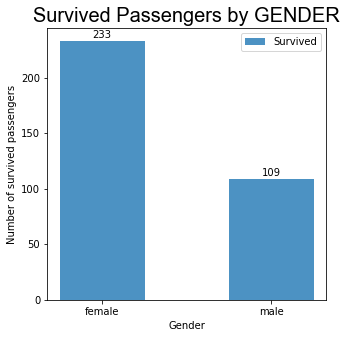

In [888]:
######################## PLOTTING THE BAR CHART ###########################

plt.figure(figsize=(5, 5))

# the x locations will be used to display values of 2 groups
x_positions = np.arange(2)

# the width of bar
bar_width = 0.5

# the x tick labels
x_texts = df_sex_count.index

# the values will be displayed are the numbers of survived people of each gender
values = df_sex_count['Survived']

# set the x label is 'Gender'
plt.xlabel('Gender')

# set the y label is 'Number of survived passengers'
plt.ylabel('Number of survived passengers')

# set the title of bar chart is 'Survived Passengers by GENDER'
plt.title('Survived Passengers by GENDER', fontsize = 20, fontname = 'Arial')

# set the text of each groups on the x axis
plt.xticks(x_positions, x_texts)

# plotting the bar chart
plt.bar(x_positions, values, alpha = 0.8, label = "Survived", width = bar_width)

# the legend provides information of data what we are plotting, in this case we are focusing on the SURVIVED passengers
plt.legend(loc = 1)

# display the value above each bar
plt.text(0, 234, '233', ha = 'center', va = 'bottom')

# display the value above each bar
plt.text(1, 110, '109', ha = 'center', va = 'bottom')

This plot displays the number of survived passengers of each group: Female and Male.

The name of groups are on the X axis, the Y axis is the number of survived passengers.

We can see that the Female group has more survived passenger than the Male, it has 233 while Male has 109. The difference is quite big, actually the value of Female is more than 2 times of Male.

## 1.2 Would Female have more chance to survived than Male?

### 1.2.1 Hypothesis:

From the box and whisker plot, we can see the number of survived female is more than doubled the number of survived male. 
Additionally with some information I collected about the Titanic disaster, i guess that female would get priority to move to the lifeboats so they have more chance to survived than male.

So my hypothesis here is: female (F) likely to have more chance to survived than male (M).

Ho: p(F) <= p(M)

Ha: p(F) > p(M)

So now I'm going to perform the Z-test with two proportion in order to prove my hypothesis correct.

### 1.2.2 Data Manipulating: 

I will use the data which extracted in 1.1.1. Here are steps I'm going to do:

Step 1: Spliting the full data into 2 groups: Male and Female.

Step 2:

For Female data: calculating the number of all passenger (n1), the number of survived passenger (x1)

  For Male data: calculating the number of all passenger (n2),  the number of survived passenger (x2)

Then calculating the proportions:

p(F) = x1/n1

p(M) = x2/n2

p_bar = (x1 + x2)/(n1 + n2)

Step 3: Perform Hypothesis testing.   

In [889]:
######################## START 1 ##########################

In [890]:
# split that data into 2 groups: Male and Female
# and just take data of columns Survived and Sex
df_full_male = full_data[ full_data['Sex'] == 'male' ][['Survived','Sex']]
df_full_female = full_data[ full_data['Sex'] == 'female' ][['Survived','Sex']]

In [891]:
# printing the first 5 rows of df_full_male
df_full_male.head()

,Survived,Sex
0,0,male
4,0,male
5,0,male
6,0,male
7,0,male


In [892]:
# printing the first 5 rows of df_full_female
df_full_female.head()

,Survived,Sex
1,1,female
2,1,female
3,1,female
8,1,female
9,1,female


In [893]:
######################## END 1 ##########################

In [894]:
######################## START 2 ##########################

In [895]:
# For Female data: 

# calculating the number of all passenger (n1)
n1 = len(df_full_female)

# calculating the number of survived passenger (x1)
x1 = len( df_full_female[ df_full_female['Survived'] == 1 ])

print(x1, n1)

233 314


In [896]:
# For Male data: 

# calculating the number of all passenger (n2)
n2 = len(df_full_male)

# calculating the number of survived passenger (x2)
x2 = len( df_full_male[ df_full_male['Survived'] == 1 ])

print(x2, n2)

109 577


In [897]:
# calculating p(M), p(F), p_bar
p_hat_F = x1/n1
p_hat_M = x2/n2
p_bar = (x1+x2)/(n1+n2)

print(p_hat_F, p_hat_M, p_bar)

0.7420382165605095 0.18890814558058924 0.3838383838383838


In [898]:
######################## END 2 ##########################

In [899]:
######################## START 3 ##########################

Before perform the hypothesis testing, I assume that:

- the sample data had been chosen randomly.

- all passengers had equaly chance to survive so they are independent samples.

As we see the size of samples are n1 = 577 and n2 = 314, they are greater than 30 and are large samples so the population distribution would approximately normal. With the assumption and large samples, i will perform the Z-test with two proportion now. 

In [900]:
# calculating the z_statistic value
z_statictic = round((p_hat_F - p_hat_M)/math.sqrt(p_bar*(1-p_bar)*(1/n1 + 1/n2)), 2)
print(z_statictic)

16.22


In [901]:
# with z_statistic = 16.22 (event not available in Z-table) then p_value < 0.0001
p_value = 0.00001

In [902]:
###################### CONCLUSION ######################

At alpha level = 0.9999, since p value < 0.0001 so we REJECT THE NULL.

That means i'm 99.99% confident to claim that the FEMALE passengers likely to have more chance to survive than MALE.

The reason might be they are usually get the high priority during the rescuing procedure so they would have more chance to survive than Male.

In [903]:
######################## END 3 ########################

# 2. ANALYZING WITH FARE

In this analyzing, I will just focus in the Survived and Fare data so i will just extract them out.

In [904]:
# split data into 2 groups: SURVIVED and NON-SURVIVED groups
fare_data_survived = full_data[full_data['Survived'] == 1][['Fare','Survived']]
fare_data_non_survived = full_data[full_data['Survived'] == 0][['Fare','Survived']]

### 2.1 Data wrangling:

In [905]:
################### START: DATA WRANGLING WITH FARE DATA OF SURVIVED PASSENGERS ######################

In [906]:
# view the first 5 rows of fare_data_survived
fare_data_survived.head()

,Fare,Survived
1,71.2833,1
2,7.9250,1
3,53.1000,1
8,11.1333,1
9,30.0708,1


In [907]:
# overview the Fare data of survived people
data_overviewing(fare_data_survived)

Type of data:  <class 'pandas.core.frame.DataFrame'>
Number of columns:  2
Column names:  Index(['Fare', 'Survived'], dtype='object')
Number of rows of full data:  342  rows.
Column Fare has: totally  342  rows,  341  rows are valid,  1  rows are invalid.
   Data values: in range ( 0.0 ,  512.3292 )
Column Survived has: totally  342  rows,  342  rows are valid,  0  rows are invalid.
   Data values:  {1}


In [908]:
extract_invalid_data(fare_data_survived, 'Fare')

,Fare,Survived
271,0.0,1


Above information tells that the DataFrame fare_data_survived has 342 rows/total 889 rows of full data, that means there are 342/889 passengers survived.

The DataFrame fare_data_survived has 2 columns: Survived column has data type of Integer (value = 0 or 1), Fare column has data type of Float.

Column Survived has no invalid row. Column Fare has 1 invalid row (Fare = 0.0) and it is the Passenger ID 271 in the data.

Due to the invalid row in the Fare column, I will filter and take the Fare values > 0.

In [909]:
################### END: DATA WRANGLING WITH FARE DATA OF SURVIVED PASSENGERS ######################

In [910]:
################### START: DATA WRANGLING WITH FARE DATA OF NON-SURVIVED PASSENGERS ######################

In [911]:
# view the first 5 rows of fare_data_non_survived
fare_data_non_survived.head()

,Fare,Survived
0,7.2500,0
4,8.0500,0
5,8.4583,0
6,51.8625,0
7,21.0750,0


In [912]:
# overview the Fare data of non-survived people
data_overviewing(fare_data_non_survived)

Type of data:  <class 'pandas.core.frame.DataFrame'>
Number of columns:  2
Column names:  Index(['Fare', 'Survived'], dtype='object')
Number of rows of full data:  549  rows.
Column Fare has: totally  549  rows,  535  rows are valid,  14  rows are invalid.
   Data values: in range ( 0.0 ,  263.0 )
Column Survived has: totally  549  rows,  549  rows are valid,  0  rows are invalid.
   Data values:  {0}


In [913]:
# extract the invalid rows of fare_data_non_survived
extract_invalid_data(fare_data_non_survived, 'Fare')

,Fare,Survived
179,0.0,0
263,0.0,0
277,0.0,0
302,0.0,0
413,0.0,0
466,0.0,0
481,0.0,0
597,0.0,0
633,0.0,0
674,0.0,0


We can see that fare_data_non_survived has 549 rows, it means there are 549 non-survived in the total 891 passengers.

Column Survived doesn't have any invalid data but column Fare does have 14 rows. I also will filter and take the Fare values > 0.

In [914]:
################### END: DATA WRANGLING WITH FARE DATA OF NON-SURVIVED PASSENGERS ######################

## 2.2 Displaying the statistic values and box plot.

What I'm going to do here are:

1.Spliting full data into 2 groups: Survived and Non-survived, just focusing on the Fare data only.

2.Displaying the statistic values of each data group.

3.Display the box and whisker plot for both data groups.

In [915]:
################################### START 1 ###################################

In [916]:
# just need data of columns: Fare, Survived
# filter and take the valid data rows (Fare values > 0)
fare_data_survived = fare_data_survived[fare_data_survived['Fare'] > 0][['Fare','Survived']]
fare_data_non_survived = fare_data_non_survived[fare_data_non_survived['Fare'] > 0][['Fare','Survived']]

In [917]:
################################### END 1 ###################################

In [918]:
################################### START 2 ###################################

In [919]:
fare_data_survived['Fare'].describe()

count    341.000000
mean      48.537330
std       66.643049
min        6.975000
25%       12.475000
50%       26.000000
75%       57.000000
max      512.329200
Name: Fare, dtype: float64

The statistic values of fare_data_survived tells us the SURVIVED passengers have:

- there are 341 values (passengers)
- the MEAN of FARE is: 48.54
- the standard deviation of Fare values is: 66.64
- the min value is: 6.975
- the max value is: 512.33
- the quartile values Q1, Q2, Q3 are: 12.475, 26 and 57.

In [920]:
fare_data_non_survived['Fare'].describe()

count    535.000000
mean      22.696673
std       31.589367
min        4.012500
25%        7.895800
50%       10.500000
75%       26.000000
max      263.000000
Name: Fare, dtype: float64

The statistic values of fare_data_survived tells us the NON-SURVIVED passengers have:

- there are 535 values (passengers)
- the MEAN of FARE is: 22.7
- the standard deviation of Fare values is: 31.59
- the min value is: 4.01
- the max value is: 263
- the quartile values Q1, Q2, Q3 are: 7.9, 10.5 and 26.

Do the comparision of 2 groups, we see that: NON-SURVIVED group only has one value greater than the SURVIVED, it is the COUNT value. It means the number of non-survived passengers is more than survived.

But SURVIVED group have greater mean, min, max, Q1, Q2, Q3 values than the NON-SURVIVED, that means they spent more money on the Fare than the NON-SURVIVED passengers.

The standard deviation value greater tells that the SURVIVED group has the wider of fare range than the NON-SURVIVED.

In [921]:
################################### END 2 ###################################

In [922]:
################################### START 3 ###################################

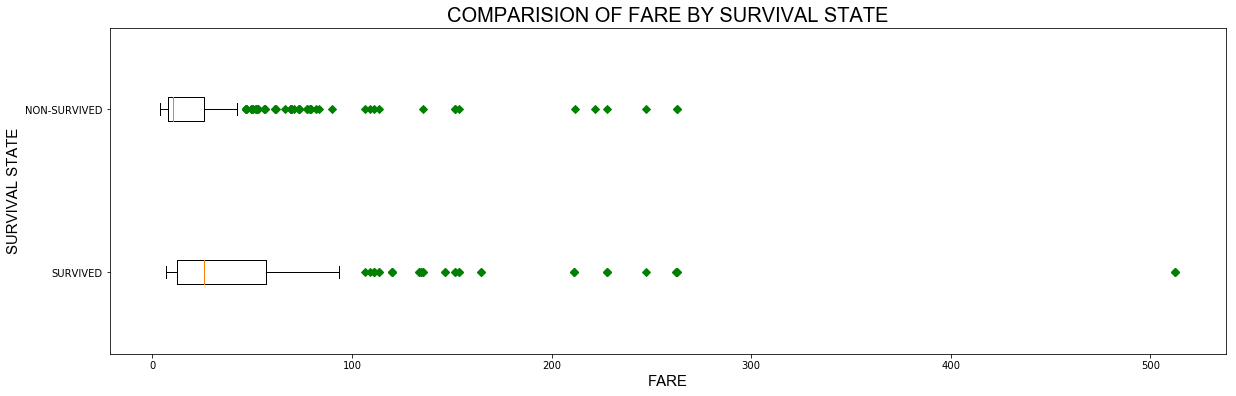

In [923]:
####################### PLOTTING BOX & WHISKER PLOT #######################

# set the figure size
plt.figure(figsize=(20,6))

# FARE array of SURVIVED passengers
fare_survived = np.array(fare_data_survived['Fare'])

# FARE array of NON-SURVIVED passengers
fare_non_survived = np.array(fare_data_non_survived['Fare'])

# a list contains both arrays
data = [fare_survived, fare_non_survived]

# y locations for 2 groups on the Y axis
y_locations = np.arange(2)

# plotting box and whisker plot for the data in the horizontal boxes
plt.boxplot(data, 0, 'gD', 0, 1)

# set the Y label is "SURVIVAL STATE"
plt.ylabel("SURVIVAL STATE", fontsize = 15, fontname = 'Arial')

# set the X label is "FARE"
plt.xlabel("FARE", fontsize = 15, fontname = 'Arial')

# set the title is "COMPARISION OF FARE BY SURVIVAL STATE"
plt.title("COMPARISION OF FARE BY SURVIVAL STATE", fontsize = 20, fontname = 'Arial')

# set the tick labels on the Y axis
plt.yticks(y_locations + 1 , ['SURVIVED', 'NON-SURVIVED'])

# display the plot
plt.show()

We can see that the box of SURVIVED group is longer than the NON-SURVIVED, means its values are more spread out than the NON-SURVIVED, it also tells that the range FARE values of SURVIVED group is wider than the NON-SURVIVED. The STANDARD DEVIATION of SURVIVED greater than NON-SURVIVED (66.64 > 31.59) also present the wider range FARE value of SURVIVED group.

The box of SURVIVED group is also more right aligned than the NON-SURVIVED, that mean most of its statistic values (MEAN, MIN, MAX, Q1, Q2, Q3) and even its outlier values are greater than the NON-SURVIVED,. All that tells that the SURVIVED group spent more money on the fare than NON-SURVIVED.

But both groups also have several the outliers, means the range of fare of each group is large range, the fare values of each group are spread out widely.

In [924]:
################################### END 3 ###################################

## 2.3 Did survived passengers spend more money for Fare than the Non-survived?

### 2.3.1 Hypothesis:

My hypothesis is: the SURVIVED group spent more money for fare than the NON-SURVIVED.

Ho: miu(s) <= miu(n)

Ha: miu(s) > miu(n)

with:

- miu(s) is the mean value of Fare of SURVIVED group
- miu(n) is the mean value of Fare of NON-SURVIVED group.

### 2.3.2 Perform hypothesis testing:

I assume that:
- this testing data is random sample from the population.
- the population data is normally distributed.
- these 2 groups are independent.

so now I will apply the T-TEST for INDEPENDENT MEANS to prove the hypothesis.

In [925]:
# this function will calculate the mean, standard deviation and size of input data
# then calculate the standard error (se)
# finally return the t-statistic value

# input parameter: values of 2 groups
# output returned: the t-statistic value

import math
def t_statistic_of_independent_means(data1, data2):
    try:
        mean1, std1, size1 = data1.mean(), data1.std(), len(data1)
        mean2, std2, size2 = data2.mean(), data2.std(), len(data2)
        
        se = math.sqrt( (std1*std1)/size1 + (std2*std2)/size2 )
        df = size1 + size2 - 2
        return round((mean2-mean1)/se, 2), df
    except:
        raise ValueError

In [926]:
# calculating t_statistic value and degree of freedom by
# passing the Fare data of 2 groups into function t_statistic_of_independent_means
t_statistic, df = t_statistic_of_independent_means(fare_data_non_survived['Fare'], fare_data_survived['Fare'])

In [927]:
# print out the t_statistic and degree of freedom values
print(t_statistic, df)

6.7 874


In [928]:
# at alpha level = 0.001 (one tailed test), df = 874
# refer to the t-table, we will have t-critical:
t_critical = 3.0996

In [929]:
#################### CONCLUSION ####################

Since the t_critical = 3.0996 < t_statistic = 6.7 so we REJECT THE NULL at alpha level = 0.001.

That means we are 99.9% confident to claim that: the SURVIVED passengers spent significantly more money for the fare than the NON-SURVIVED.

# 3. ANALYZING WITH AGE DATA

In this analyzing, I will just focus on the Age data of SURVIVED passengers

## 3.1 Data Wrangling:

In [930]:
# extracting SURVIVED and AGE data of SURVIVED passengers
full_data_survived_age = full_data[full_data['Survived'] == 1][['Survived','Age']]

In [931]:
full_data_survived_age.head()

,Survived,Age
1,1,38.0
2,1,26.0
3,1,35.0
8,1,27.0
9,1,14.0


In [932]:
data_overviewing(full_data_survived_age)

Type of data:  <class 'pandas.core.frame.DataFrame'>
Number of columns:  2
Column names:  Index(['Survived', 'Age'], dtype='object')
Number of rows of full data:  342  rows.
Column Survived has: totally  342  rows,  342  rows are valid,  0  rows are invalid.
   Data values:  {1}
Column Age has: totally  342  rows,  290  rows are valid,  52  rows are invalid.
   Data values: in range ( 0.42 ,  80.0 )


Above informations tell that the DataFrame full_data_survived_age has:
- 2 data olumns are: Survived and Age
- 342 data rows.
- all data rows of Survived column are valid, no invalid rows found. The data value is 1 - SURVIVED.
- column Age has 290 valid rows, data values fall in range (0.42, 80.0). It has 52 invalid rows (NaN values) so I need to exclude them from my analyzing by using function dropna() of DataFrame

## 3.2 Displaying the statistic values and box plot.

In [933]:
# just extract the data of column 'Age'
# remove all NaN values by using dropna()
age_data_survived = full_data_survived_age['Age'].dropna()

# create DataFrame
df_age_data_survived = pd.DataFrame( data=age_data_survived, columns=['Age'])

# view the first 5 records of the DataFrame
df_age_data_survived.head()

,Age
1,38.0
2,26.0
3,35.0
8,27.0
9,14.0


In [934]:
# take a look the statistic values 
df_age_data_survived.describe()

,Age
count,290.000000
mean,28.343690
std,14.950952
min,0.420000
25%,19.000000
50%,28.000000
75%,36.000000
max,80.000000


Above statistic values tell us:
- df_age_data_survived has 290 values after removing the invalid rows.
- mean of age is 28.34 (years old) with standard deviation is 14.95 (years)
- the minimum age of survived passenger is 0.42 (years old) while the maximum is 80 (years old).
- the quartile values (Q1, Q2, Q3) are: 19, 28 and 36.

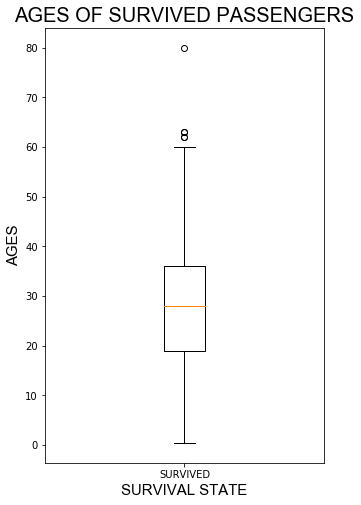

In [935]:
####################### PLOTTING BOX & WHISKER PLOT #######################

# set the figure size
plt.figure(figsize=(5,8))

# x locations
x_locations = np.arange(1)

# plotting box and whisker plot for the data in the horizontal boxes
plt.boxplot(list(df_age_data_survived['Age']))

# set the Y label is "SURVIVAL STATE"
plt.ylabel("AGES", fontsize = 15, fontname = 'Arial')

# set the X label is "FARE"
plt.xlabel("SURVIVAL STATE", fontsize = 15, fontname = 'Arial')

# set the title is "COMPARISION OF FARE BY SURVIVAL STATE"
plt.title("AGES OF SURVIVED PASSENGERS", fontsize = 20, fontname = 'Arial')

# set the tick labels on the Y axis
plt.xticks(x_locations + 1 , ['SURVIVED'])

# display the plot
plt.show()


We can see the box is between 19 and 36, it means the most of age values lie between 19 and 36 (the Q1 and Q3 values), means most of survived passengers have ages in that interval.

The minimum and maximum value of ages are represented as the lowest and highest point of the whisker.

There are some dots above the highest point of the whisker, they are outlier values whose ages over 60 years old.

So we can conclude that the AGE range of SURVIVED passenger is a little spread out, there are some outlier in the set of values, and most of ages fall in the interval between 19 and 36 (years old) 

## 3.3. Did the passengers whose ages in [19, 36] have more chance to survive than the others?

### 3.3.1 Hypothesis:

I guess that passengers whose ages fall in that interval would have more chance to survive than the other.

I'm going to split data into 2 groups:
- group A: ages in [19, 36] (means: 19 <= age <= 36)
- group B: ages NOT in [19, 36] (means: age < 19 AND age > 36)    

My hypothesis here is: the survival rate of group A is higher than the group B. So i have:

Ho: p(A) <= p(B)

Ha: p(A) > p(B)

with:
- p(A) is the survival rate of group A.
- p(B) is the survival rate of group B.

So now I'm going to perform the Z-test with two proportion in order to prove my hypothesis correct.

### 3.3.2 Perform Hypothesis Testing:

Here are steps I will do now:

1.Split raw data into 2 data groups A and B. (just take data of columns Age and Survived, remove all NaN values)

2.For data group A: calculating the Number of all passenger (call n1) and the Number of survived passengers (call x1)

  For data group B: calculating the Number of all passenger (call n2) and the Number of survived passengers (call x2)

  Calculating the survival proportion of each group:
    - p(A) = x1 / n1
    - p(B) = x2 / n2
    - p_bar = (x1+x2)/(n1+n2)    

3.Perform hypothesis testing.

In [936]:
######################## START 1 ##########################

In [937]:
# just extract data of columns Age and Survived
# remove all NaN values
age_n_survived_full_data = full_data[['Age','Survived']].dropna()

In [938]:
# function will split data into 2 groups A and B
# if 19 <= age <= 36 --> group A
# else group B

def grouping_age(value):
    try:
        if value >= 19 and value <= 36:
            return 'A'
        else:
            return 'B'
    except:
        raise ValueError

In [939]:
# create new column 'GROUP' then apply function grouping_age for the column Age
age_n_survived_full_data['GROUP'] = age_n_survived_full_data['Age'].apply(grouping_age)

In [940]:
age_n_survived_full_data.head()

,Age,Survived,GROUP
0,22.0,0,A
1,38.0,1,B
2,26.0,1,A
3,35.0,1,A
4,35.0,0,A


In [941]:
print(len(age_n_survived_full_data))

714


In [942]:
# new DataFrames for the data of group A and B
# just take the column Survived which is survival status
df_group_A = age_n_survived_full_data[ age_n_survived_full_data['GROUP'] == 'A' ]
df_group_B = age_n_survived_full_data[ age_n_survived_full_data['GROUP'] == 'B' ]

In [943]:
######################## END 1 ##########################

In [944]:
######################## START 2 ########################

In [945]:
# the Number of all passenger of group A: n1
n1 = len(df_group_A)

# the Number of survived passengers of group A: x1
x1 = len(df_group_A[ df_group_A['Survived'] == 1 ])

print(n1, x1)

380 148


In [946]:
# the Number of all passenger of group B: n2
n2 = len(df_group_B)

# the Number of survived passengers of group B: x2
x2 = len(df_group_B[ df_group_B['Survived'] == 1 ])

print(n2, x2)

334 142


In [ ]:
# calculating p(A), p(B), p_bar
p_hat_A = x1/n1
p_hat_B = x2/n2
p_bar = (x1+x2)/(n1+n2)

print(p_hat_A, p_hat_B, p_bar)

In [948]:
######################## END 2 ##########################

In [949]:
######################## START 3 ########################

Before perform the hypothesis testing, I assume that:
- the sample data had been chosen randomly.
- all passengers had equaly chance to survive so they are independent samples.

 As we see the size of samples are n1 = 380 and n2 = 334, they are greater than 30 and are large samples so the population distribution would approximately normal. With the assumption and large samples, i will perform the Z-test with two proportion now.

In [950]:
# calculating the z_statistic value
z_statictic = round((p_hat_A - p_hat_B)/math.sqrt(p_bar*(1-p_bar)*(1/n1 + 1/n2)), 2)
print(z_statictic)

-0.97


In [951]:
# with Z-statistic value is -0.97, refer to the Z-table i have p-value
p_value = 0.166

In [952]:
###################### CONCLUSION ######################

At alpha level = 0.95, since p_value = 0.166 < 0.95 so we FAIL TO REJECT THE NULL.

That means the passengers whose ages in [19, 36] do NOT have the survival rate higher than the rest.

The box & whisker plot shows that most of survived people have ages in [19, 36] but actually there were 380 passengers like them among total 714 passengers on Titanic, the survival rate of theirs was high is easy to understand.

It does NOT guarantee that people whose ages in [19, 36] would have more chance to survive in other disaters like Titanic.

In [953]:
######################## END 3 ########################

# 4. CONCLUSION:

## 4.1 Which kind of passenger has more chance to survived? 

The analyzing with GENDER absolutely proves that GENDER would affect to the survival probability positively when the disasters like Titanic happened, the statistical values shows that Female has higher rate than Male.

- There were 233 female among 342 totally survived passengers (68%)
- Their survival rate was significantly higher than male (74.2% for female, 18.9% for male)

The statement "Ladies first" could explain this, female usually will get high priority for rescuing when disasters happened, that's why they are more likely to survive than the strong party, and we are 99.99% ensure that by performing the Hypothesis testing.

Female got high priority, that's easy to understand for me but the reason that I'm going to discuss next suprised me. It is MONEY, interesting !!! and I'm 99.9% confident to ensure that people who spent more money on the fare would have more chance to survive.

Most of the statistical values (except the number of passengers) of SURVIVED passengers are greater than the NON-SURVIVED.
 - the average fare of SURVIVED was 48.53 (compare to 22.7 of NON-SURVIVED)
 - the minimum fare of SURVIVED was 6.975 (compare to 4.01 of NON-SURVIVED)
 - the maximum fare of SURVIVED was 512.33 (compare to 263 of NON-SURVIVED)

and other statistical values as well, that means the SURVIVED passengers spent more money for fare than the NON-SURVIVED. It reminds me about the unfair treatment during the evacuation, seem the rich people were treated better than who has less money.

When seeing the age of survived people, most of them fall between 19 and 36 years and I was thinking that those people could have more chance to survive than others who were older or younger. The age between 19 and 36 would be ideal for people in this case because they were strong and smart enough to find the way to escape the ship.

But when compared the survival rate of those people with the others, i was not confident anymore. The rate of ages in [91, 36] years old was 38.95%, smaller than 42.51% of the rest, and I rejected the hypothesis after perform the testing to compare 2 proportions.

During exploring dataset, I found there were 380 passengers had age in [19, 36] years old among 714 passengers, that could explain why most of survived passengers are in that range of age.

I guess the rich ladies would like my conclusion, they would have more chance to survive than others.

## 4.2 Limitations of dataset:

Titanic had an estimated 2,224 people on board when she struck an iceberg and more than 1,500 people dead after it sank, it means there were about 700 people survived. The dataset we have here includes 342 survived 549 non-survived people, it means still lacking information of about 360 survived and 1,000 non-survived people. It is the significant lacking if we compare to the existing dataset, it could limit the analyzing which requires the non-survived people's data, or even result in the incorrect conclusion of analyzing which using that data.

My analyzing with Fare is one sample. I was 99.9% confident to ensure the SURVIVED passengers spent more money than the NON-SURVIVED after doing Hypothesis testing. What will happen if I have enough data? means the data of 1,000 non-survived and 360 survived people lacking would be included as well. I might have to reject the hypothesis or the level of confidence might not be 99.9% anymore. The analyzing with Gender would be affected as well if there is no lacking of data.

The second thing is the dataset has columns:
    - Pclass represent for the social class.
    - Fare represents for money.
    - SibSp and Parch represents for the number of people of her/his family on the board.
    - Embarked represent for where the passenger started.

Those informations for me seem to measure the power of their voice on that ship, excluding some basic informations (PassengerId, Survived, Name, Sex) then they occupied 5 per 8 columns of remained informations. Their occurences could make analysts focus on the social informations instead of other personal informations, then it could result in the bias of conclusions.

Another thing about the dataset which I'm still wondering is what should I use the Cabin data for analyzing? For me it is just the name of a room, I don't know where was it in Titanic? It was the left or right side of the ship? How can I know which cabin was near the place where the iceberg collided the ship?... Actually I'm interested in whether or not the passenger's weight affects to the survival? the lifeboat would be not big enough for heavy people so small people could have more chance. I wish more information should be provided then we could see the big picture of disaster. I think that the data was collected based on the point of view of the collecters and it could limit the analyzings.

## 4.3 What's next?

I'm also interested in how other factors like PCLASS, EMBARKED affect to the survival probability of passengers, in near furture I will do the analyzing and resubmit this project.